In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


1) 히스토그램을 활용한 최고기온, 최저 기온, 평균기온 분포 확인하기


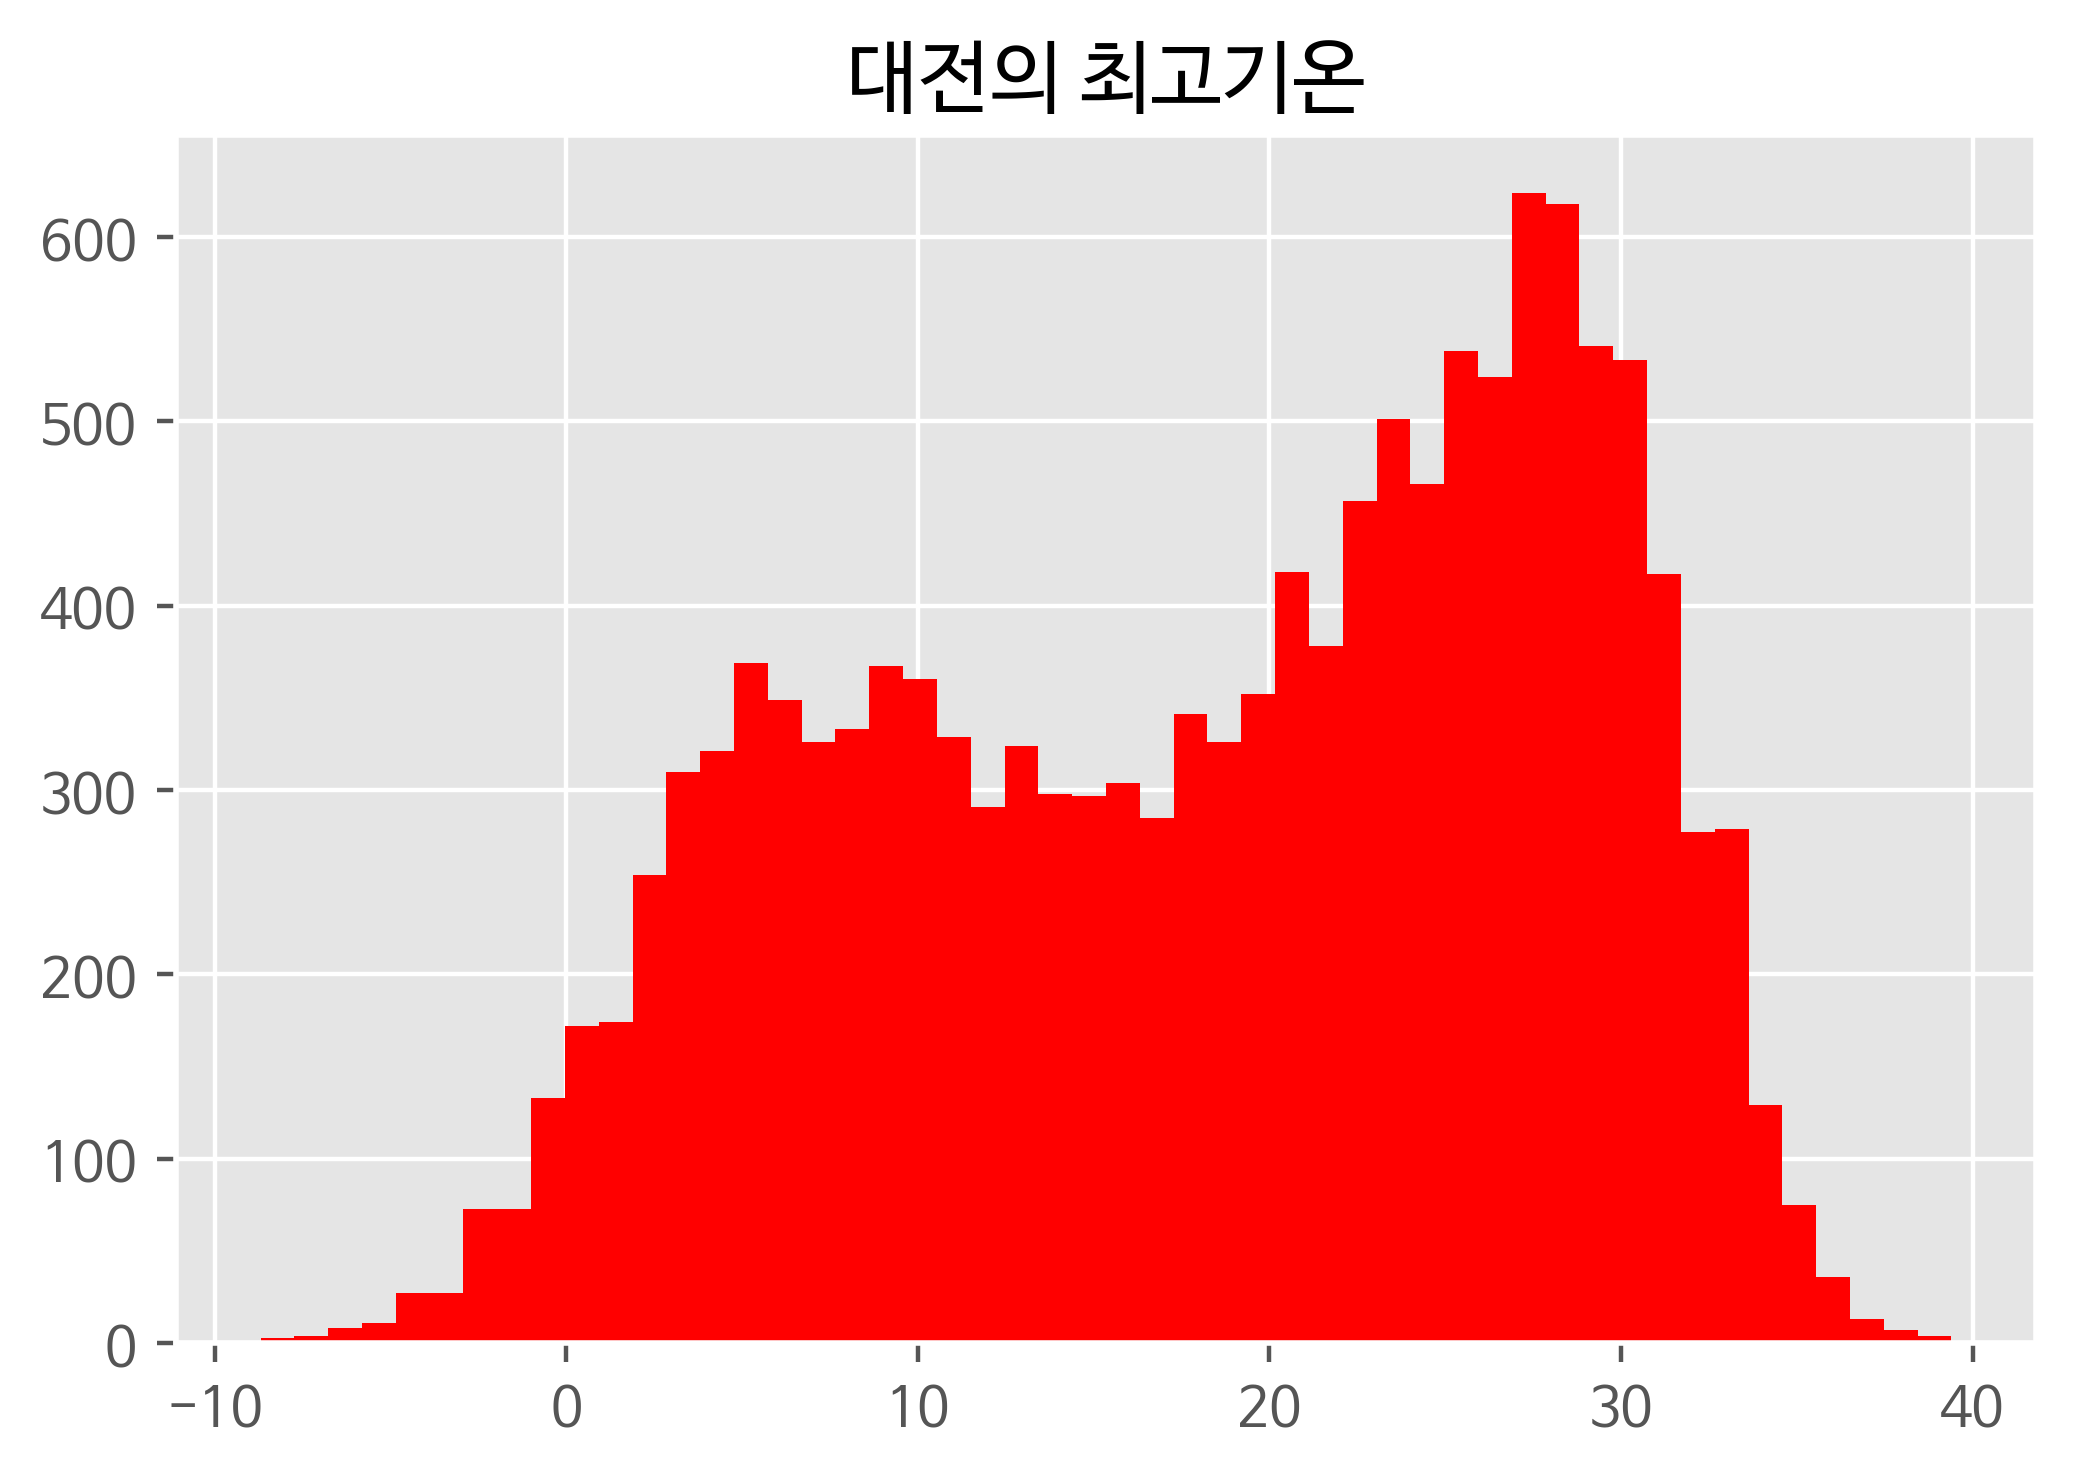

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('pf.csv',encoding='cp949')

data = csv.reader(f)
next(data) #헤더

high=[] #최고기온


for row in data:
  if row[-1] != '':
    high.append(float(row[-1]))

#최고기온 데이터 히스토그램
plt.figure(dpi=200)
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

plt.hist(high, bins=50,color='r')
plt.title('대전의 최고기온')
plt.show()

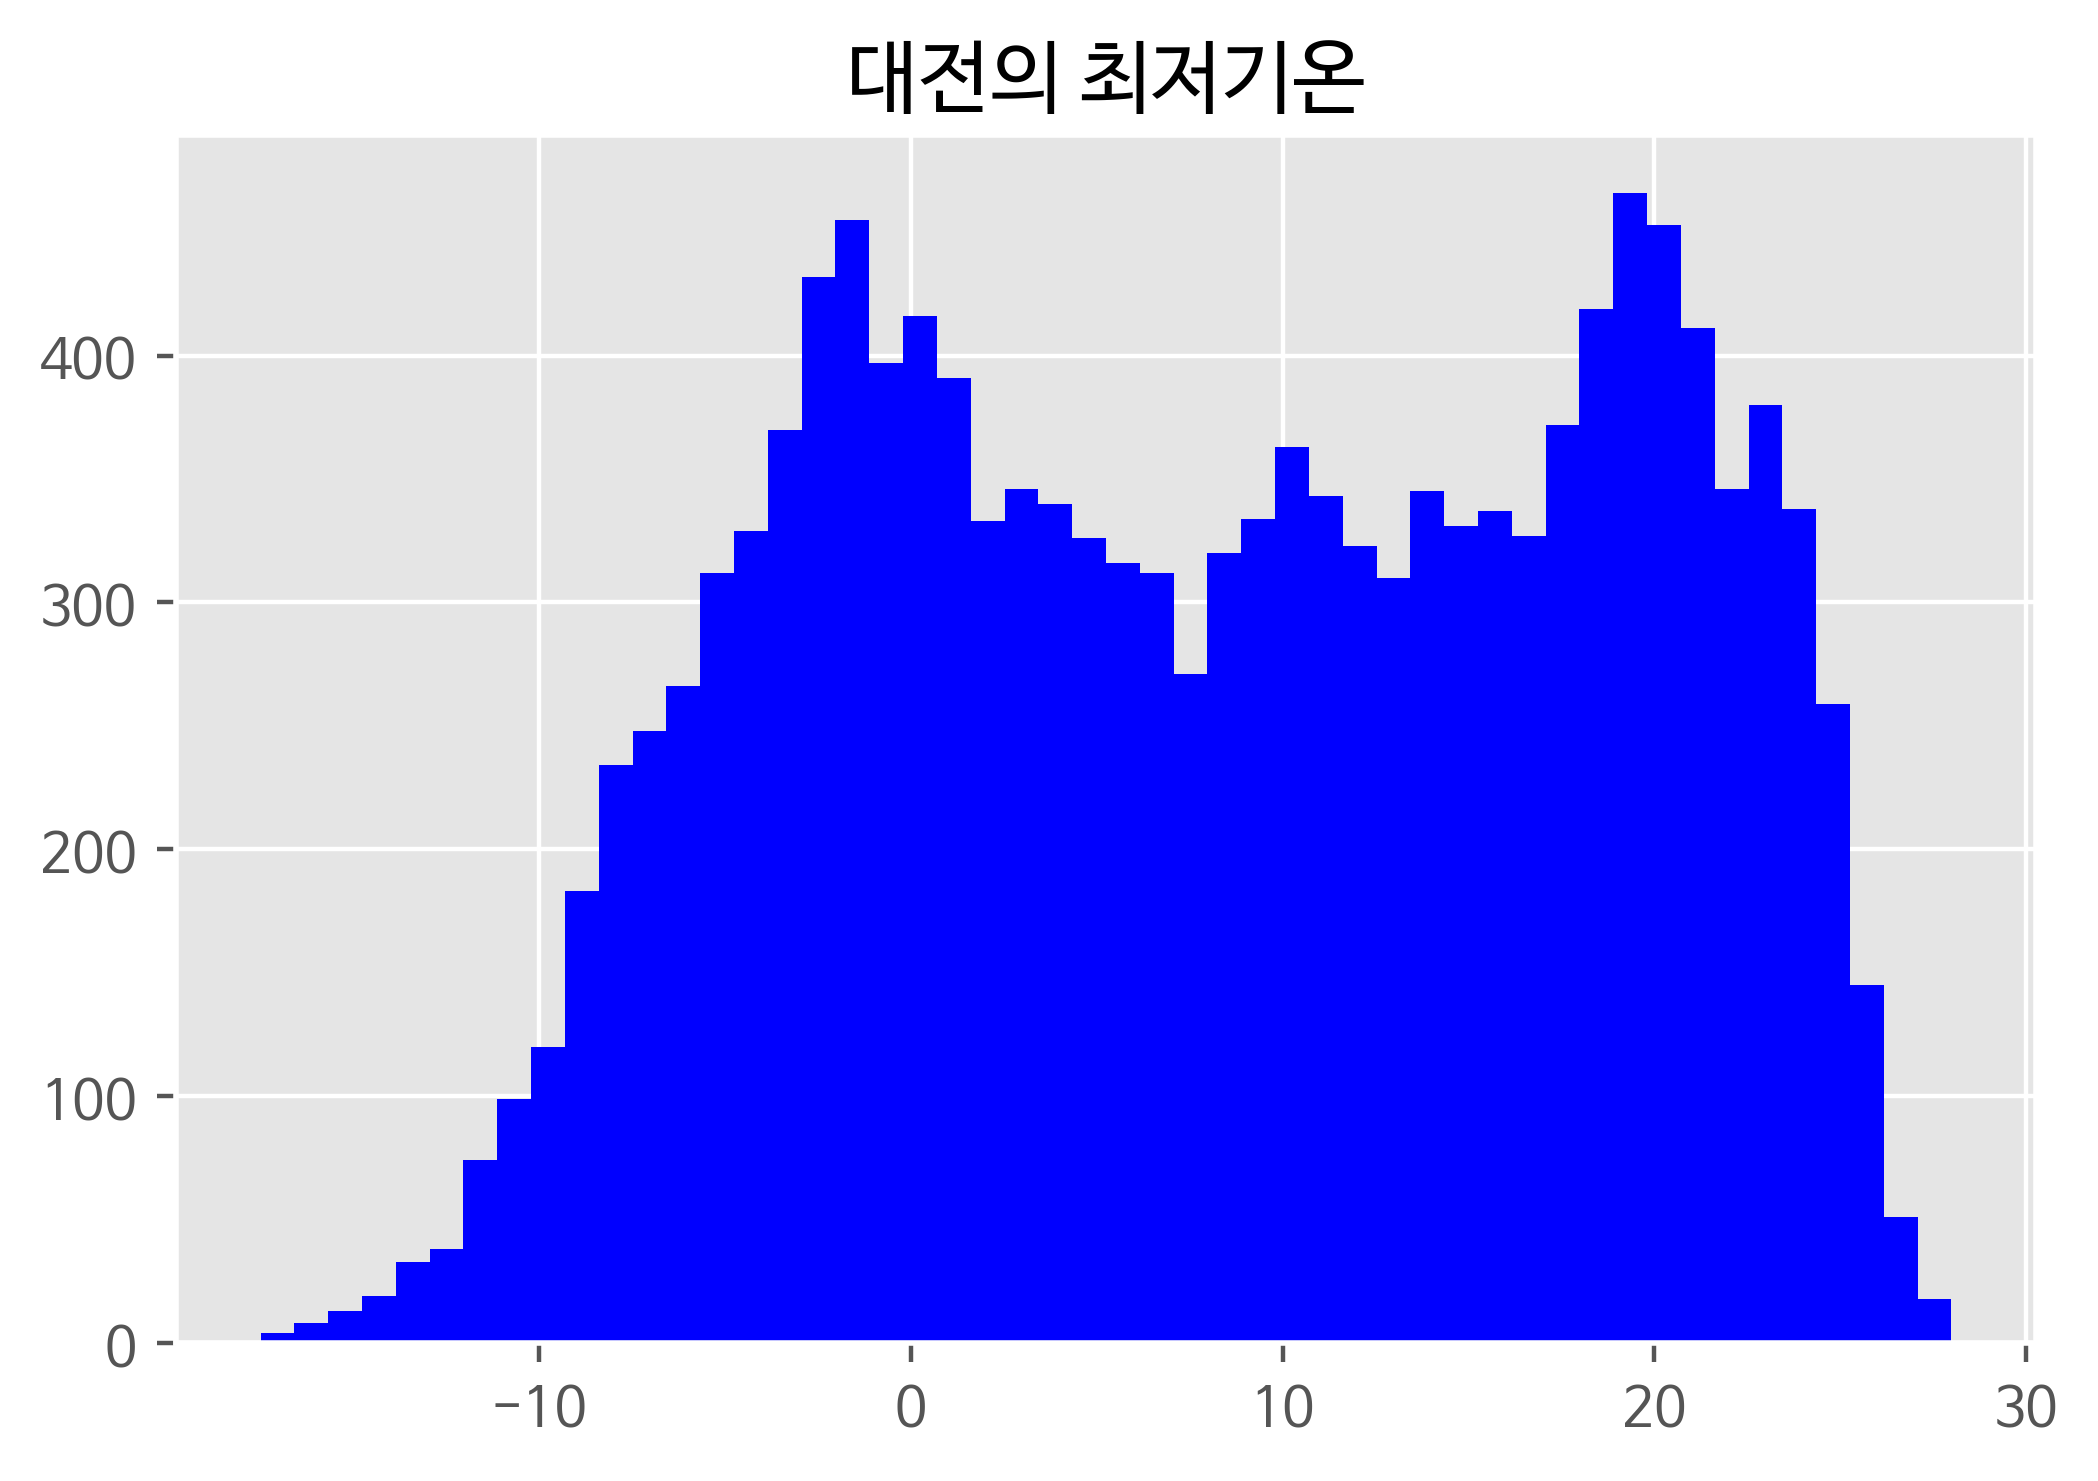

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('pf.csv',encoding='cp949')

data = csv.reader(f)
next(data) #헤더

low=[] #최저기온


for row in data:
  if row[-2] != '':
    low.append(float(row[-2]))

#최저기온 데이터 히스토그램
plt.figure(dpi=200)
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

plt.hist(low, bins=50,color='b')
plt.title('대전의 최저기온')
plt.show()

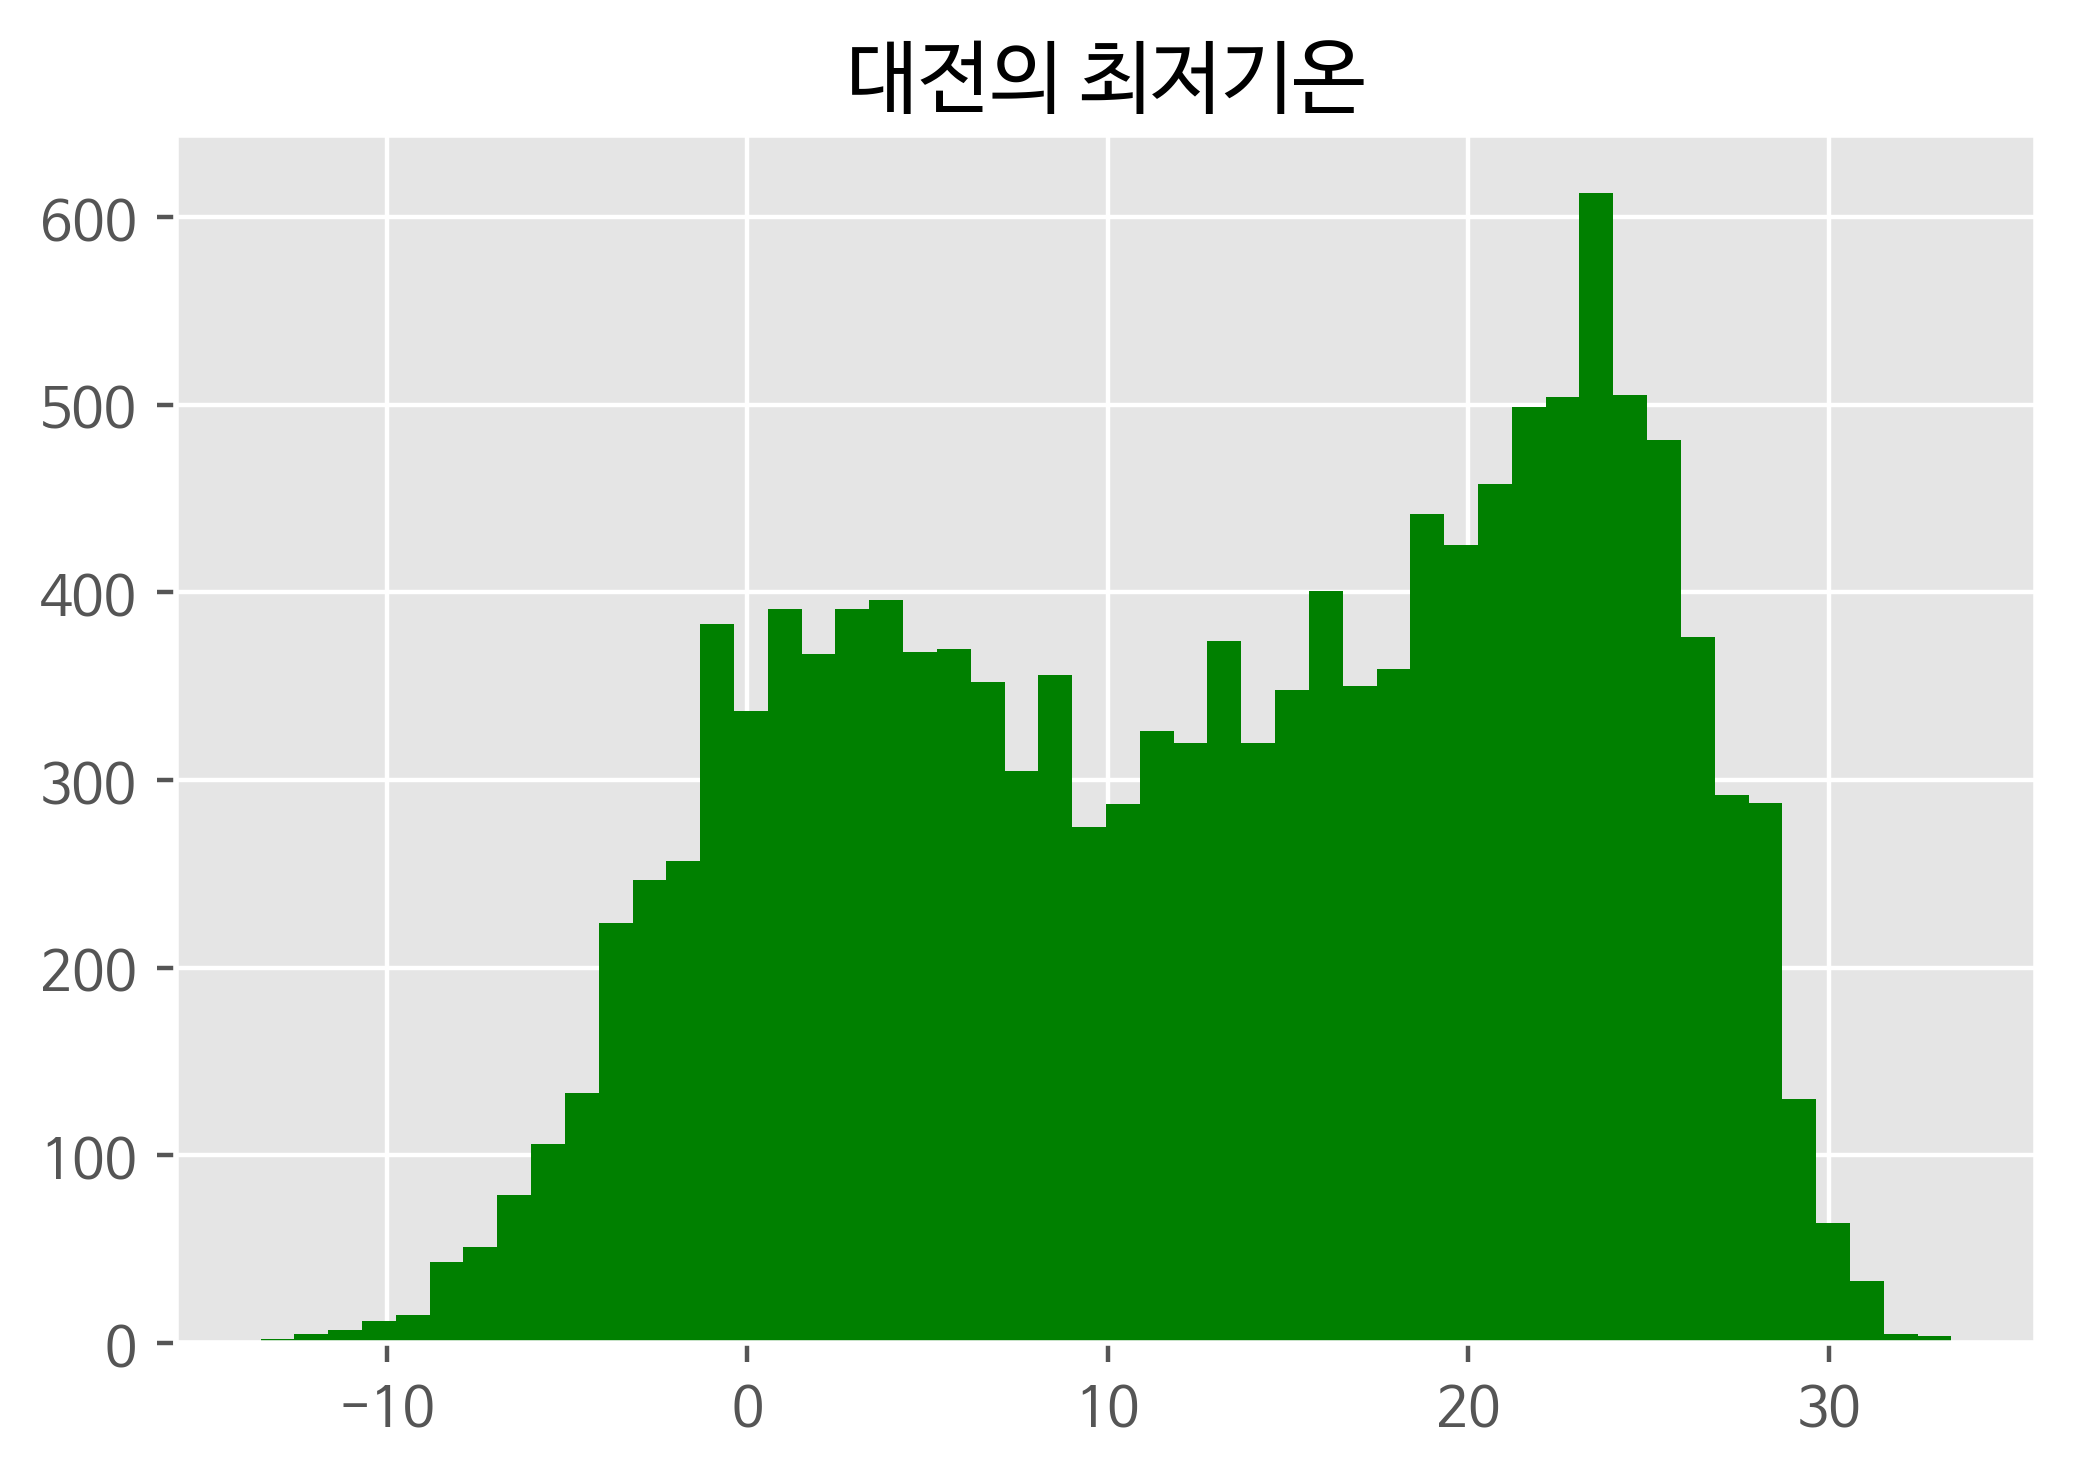

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('pf.csv',encoding='cp949')

data = csv.reader(f)
next(data) #헤더

avg=[] #평균기온


for row in data:
  if row[-3] != '':
    avg.append(float(row[-3]))

#평균기온 데이터 히스토그램
plt.figure(dpi=200)
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

plt.hist(avg, bins=50,color='g')
plt.title('대전의 평균기온')
plt.show()

2) 상자그림을 활용한 최고기온 vs 서울 최고기온

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


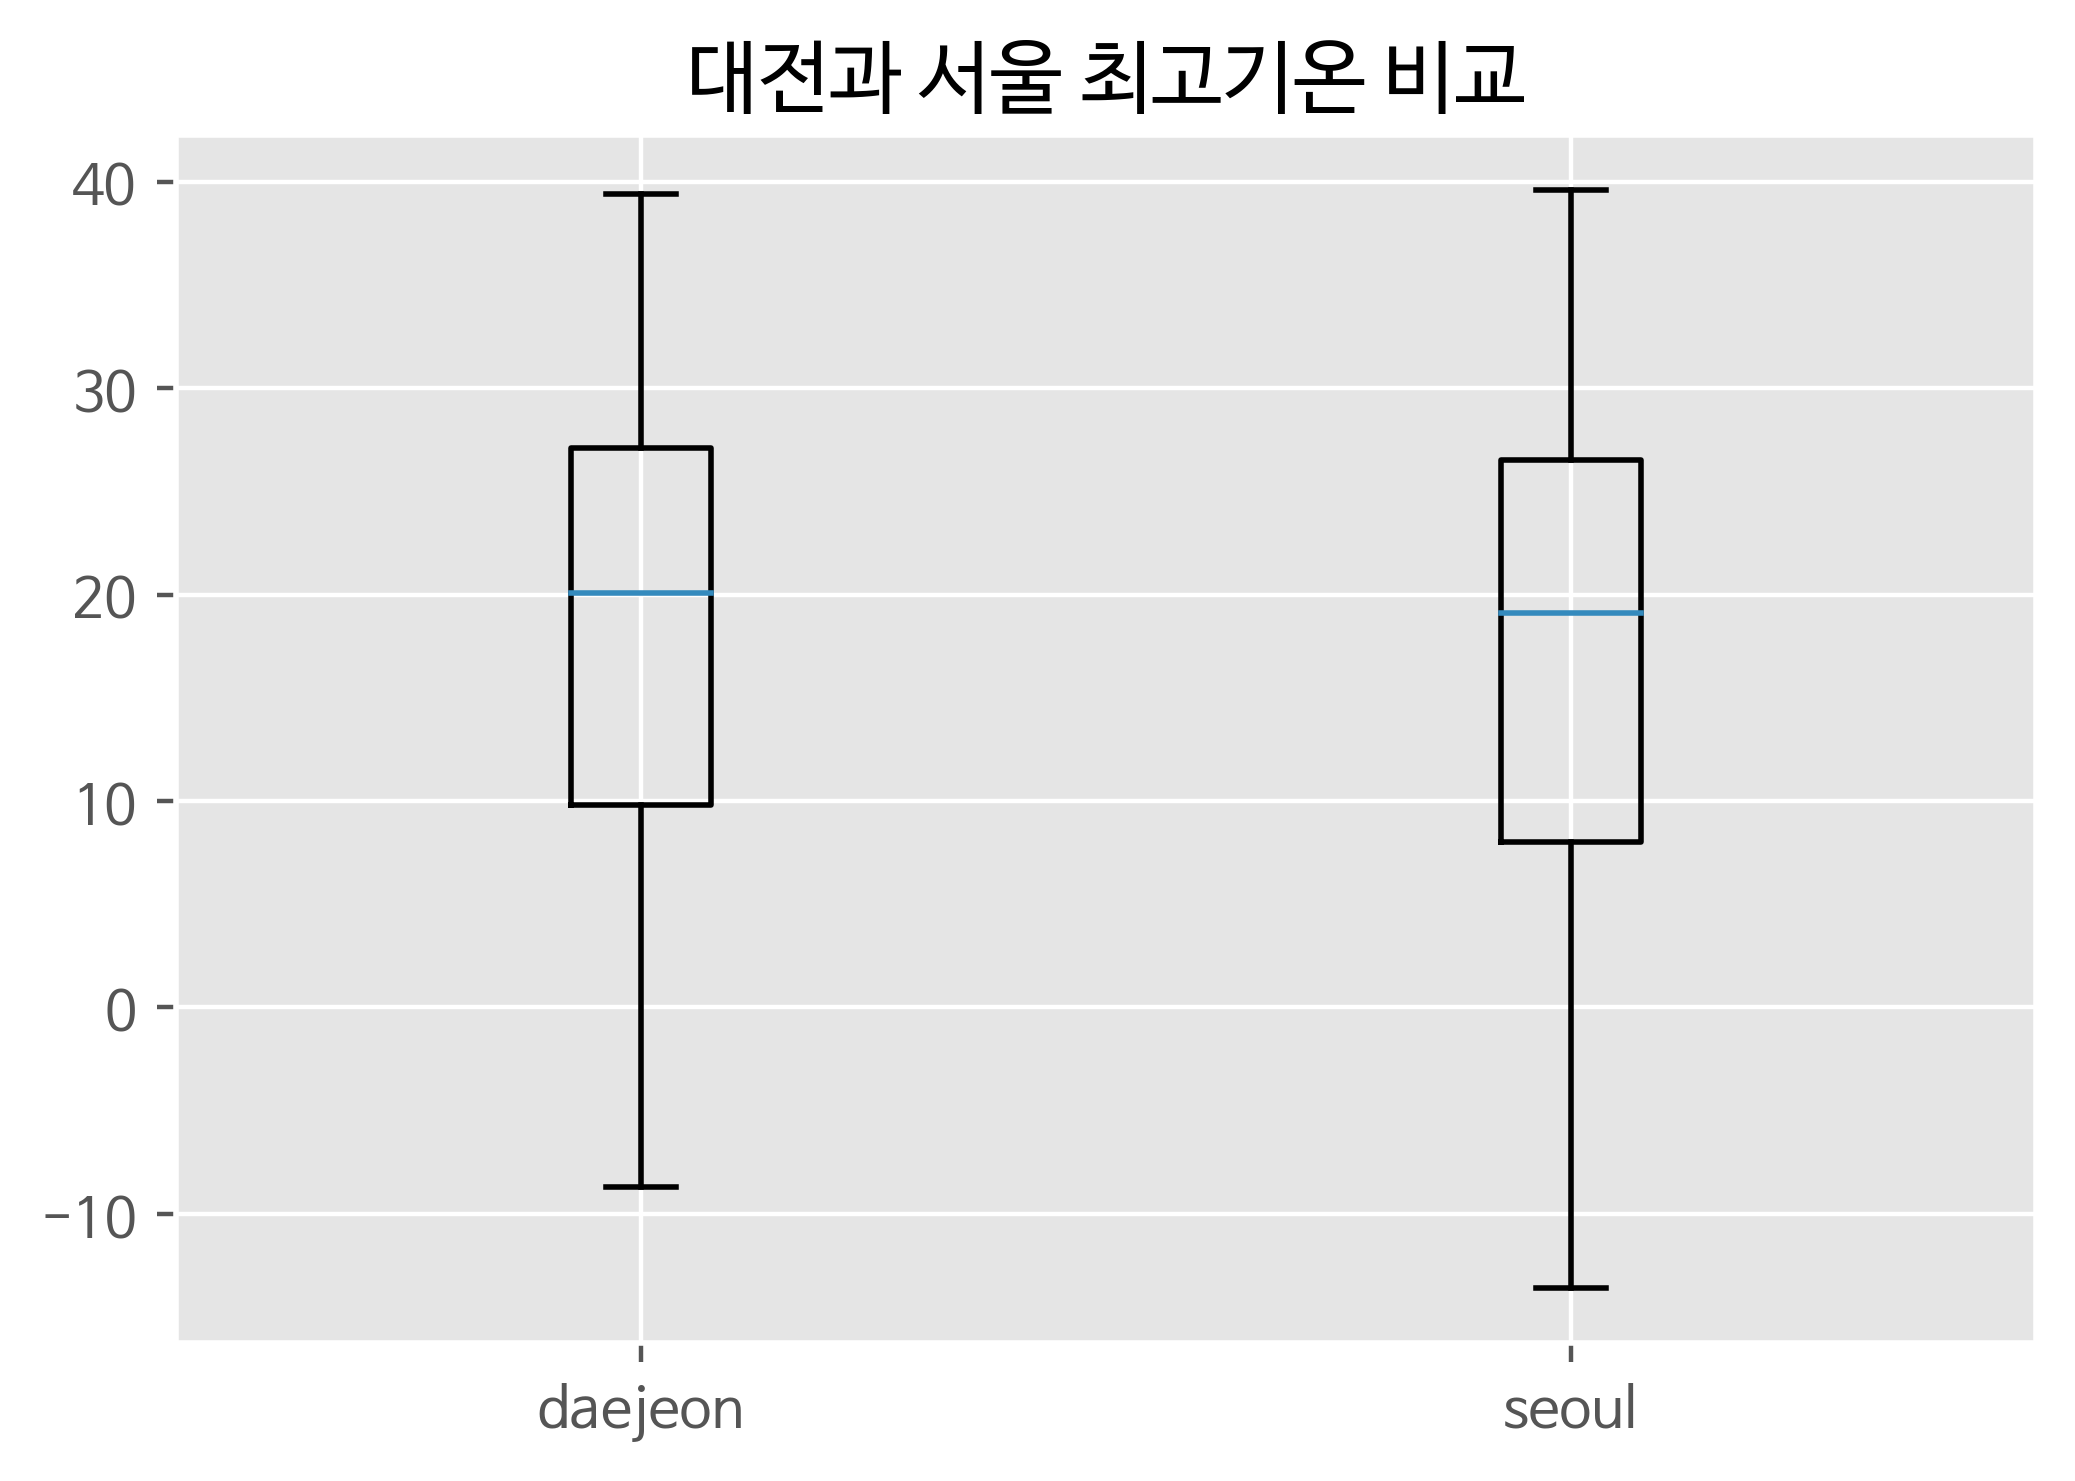

In [ ]:
import csv
import matplotlib.pyplot as plt

f1 = open('pf.csv',encoding='cp949')
f2 = open('seoul.csv',encoding='cp949')

daejeon_data = csv.reader(f1)
seoul_data = csv.reader(f2)

next(daejeon_data) #헤더
next(seoul_data) #헤더

daejeon=[]
seoul=[]
for row in daejeon_data: 
  if row[-1] != '': #최고 기온 데이터 값이 존재하면 (결측치는 제외)
    daejeon.append(float(row[-1])) 

for row in seoul_data:
  if row[-1] != '':
    if int(row[0].split('-')[0]) >= 1984:
      seoul.append(float(row[-1]))

plt.figure(dpi=200)
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

plt.boxplot([daejeon,seoul])
plt.xticks([1, 2],['daejeon', 'seoul'])
plt.title('대전과 서울 최고기온 비교')

plt.show()

3) 월별 최고기온 상자 그림 그리기


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


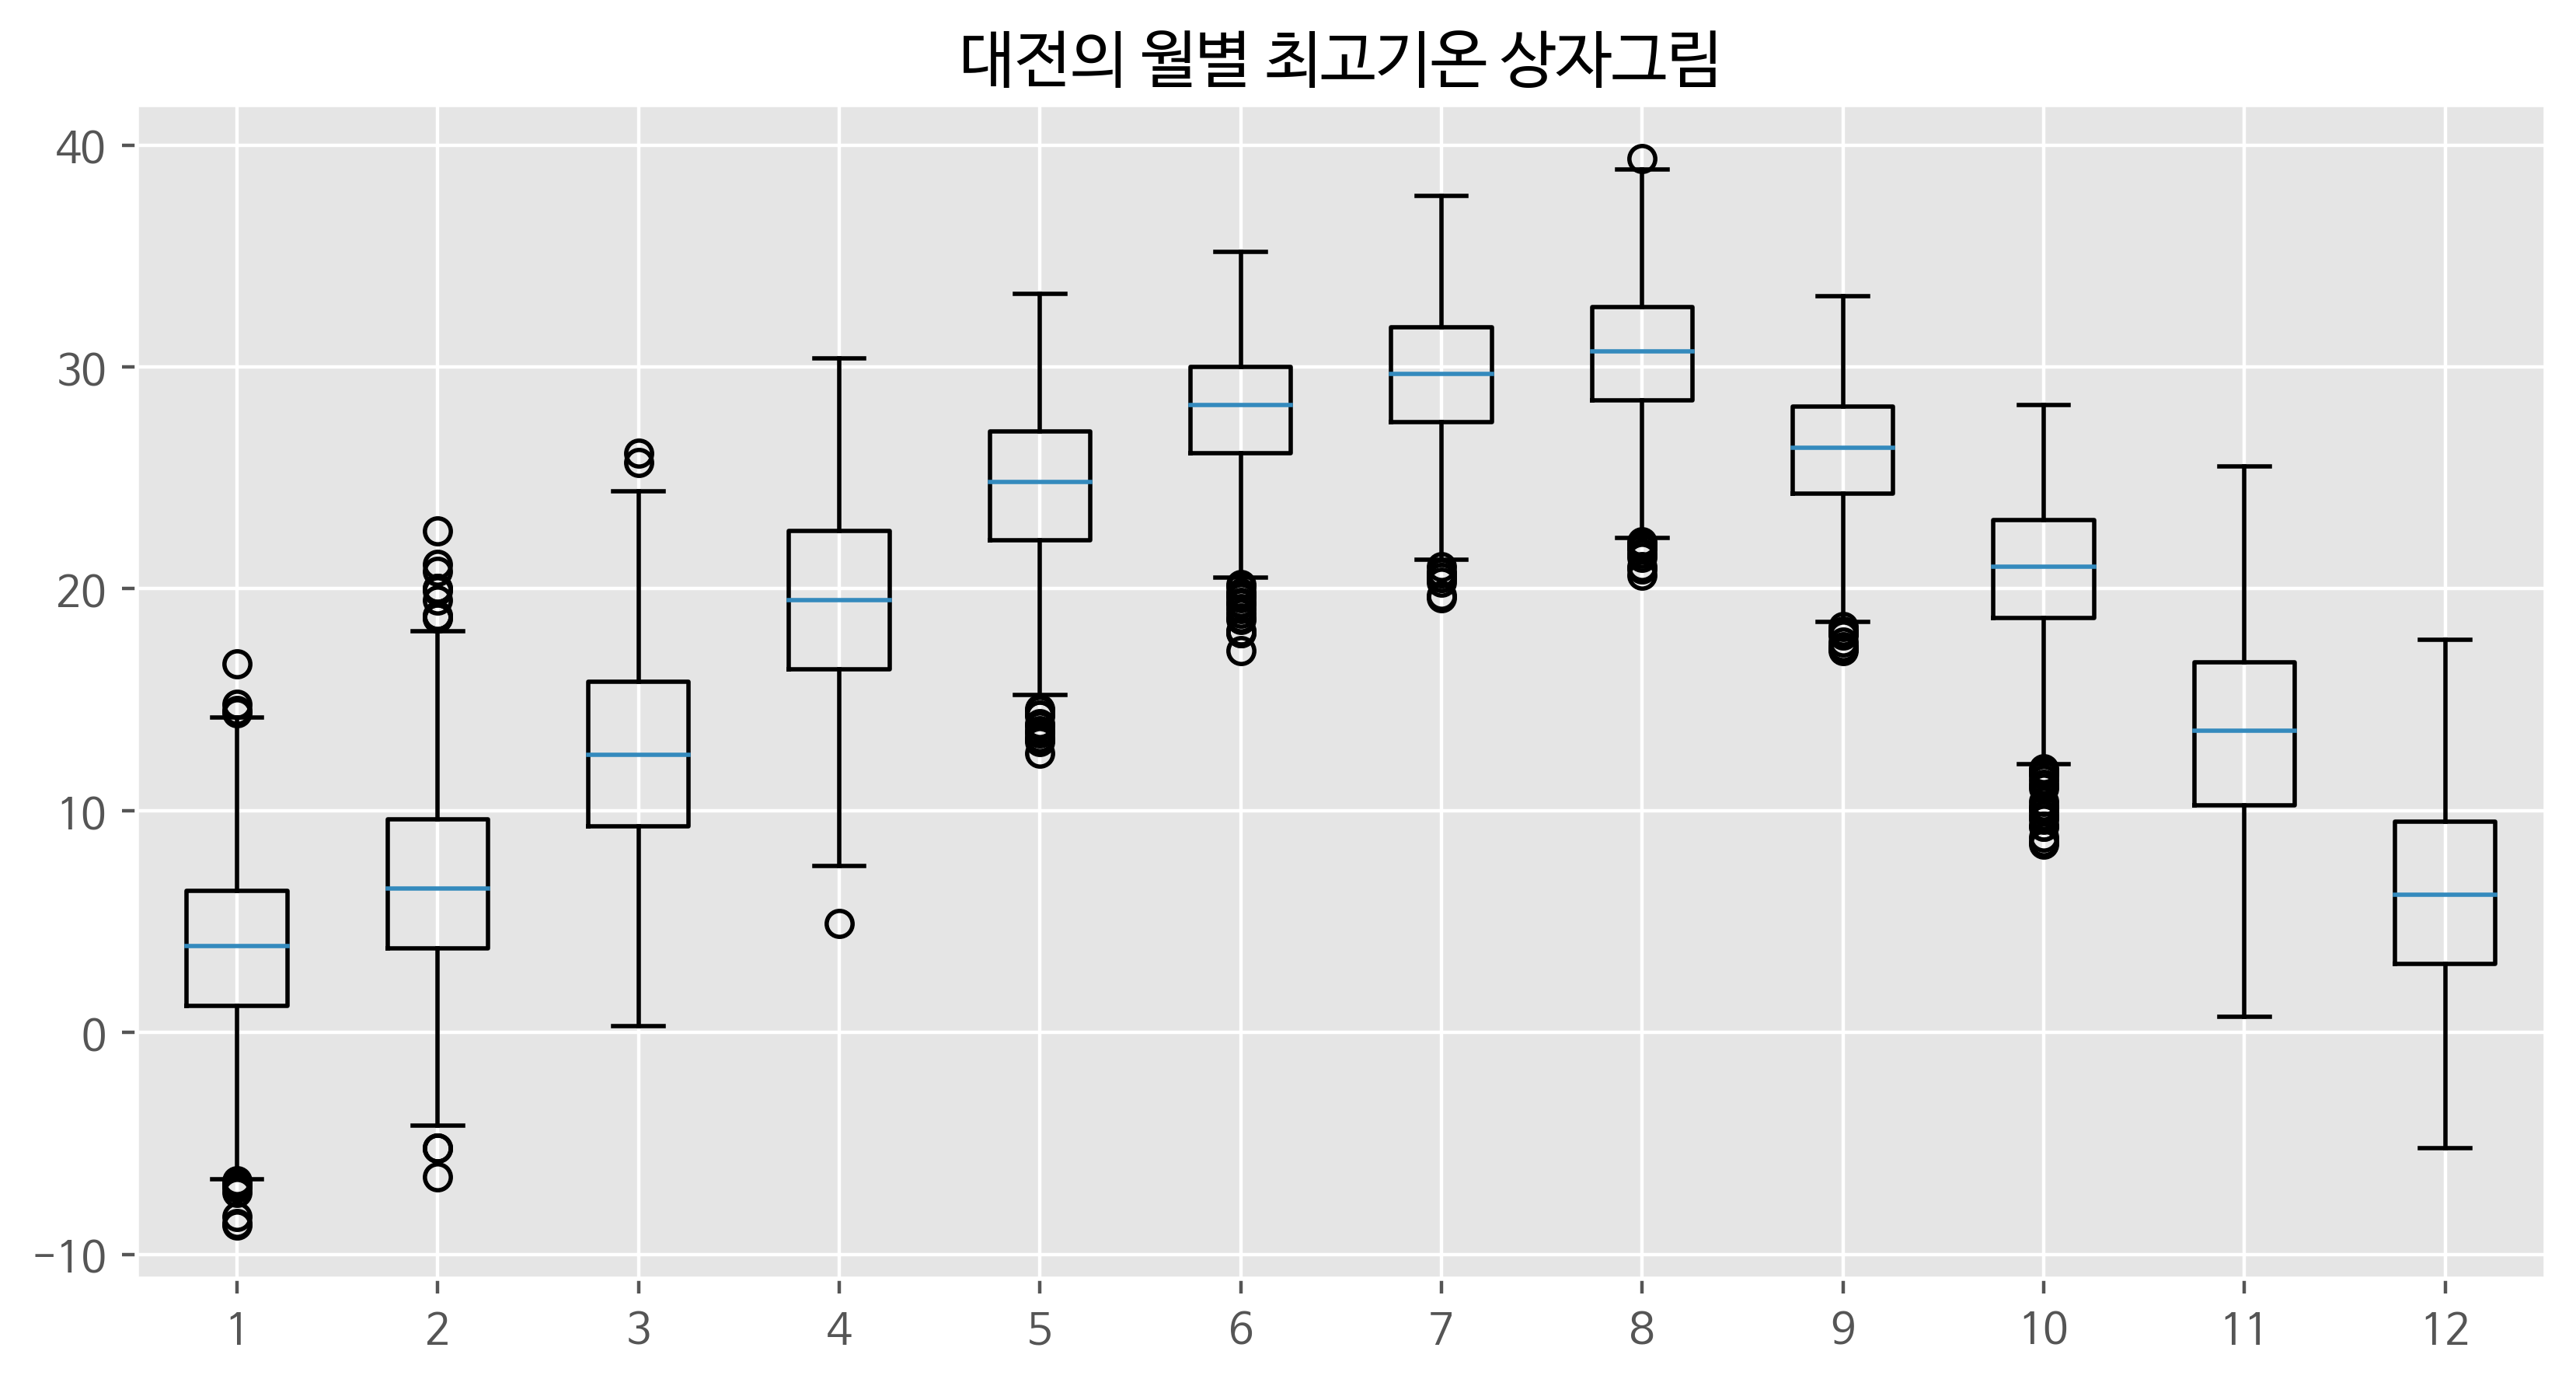

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('pf.csv',encoding='cp949')

data = csv.reader(f)
next(data) #헤더

month=[] #월별 데이터를 저장할 리스트 day변수 선언

for i in range(12):
  month.append([]) #month리스트에 31개 생성

for row in data:
  if row[-1] != '':
    month[int(row[0].split('-')[1])-1].append(float(row[-1]))

plt.style.use("ggplot")
# 그래프 스타일 지정 (회색 배경의 격자무늬, 2/4 값을 의미하는 선의 색 변경)
plt.figure(figsize=(10,5),dpi=200)
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

plt.boxplot(month)
plt.title('대전의 월별 최고기온 상자그림')

plt.show()

4) 특정 달의 일별 최고 기온 상자 그림 그리기


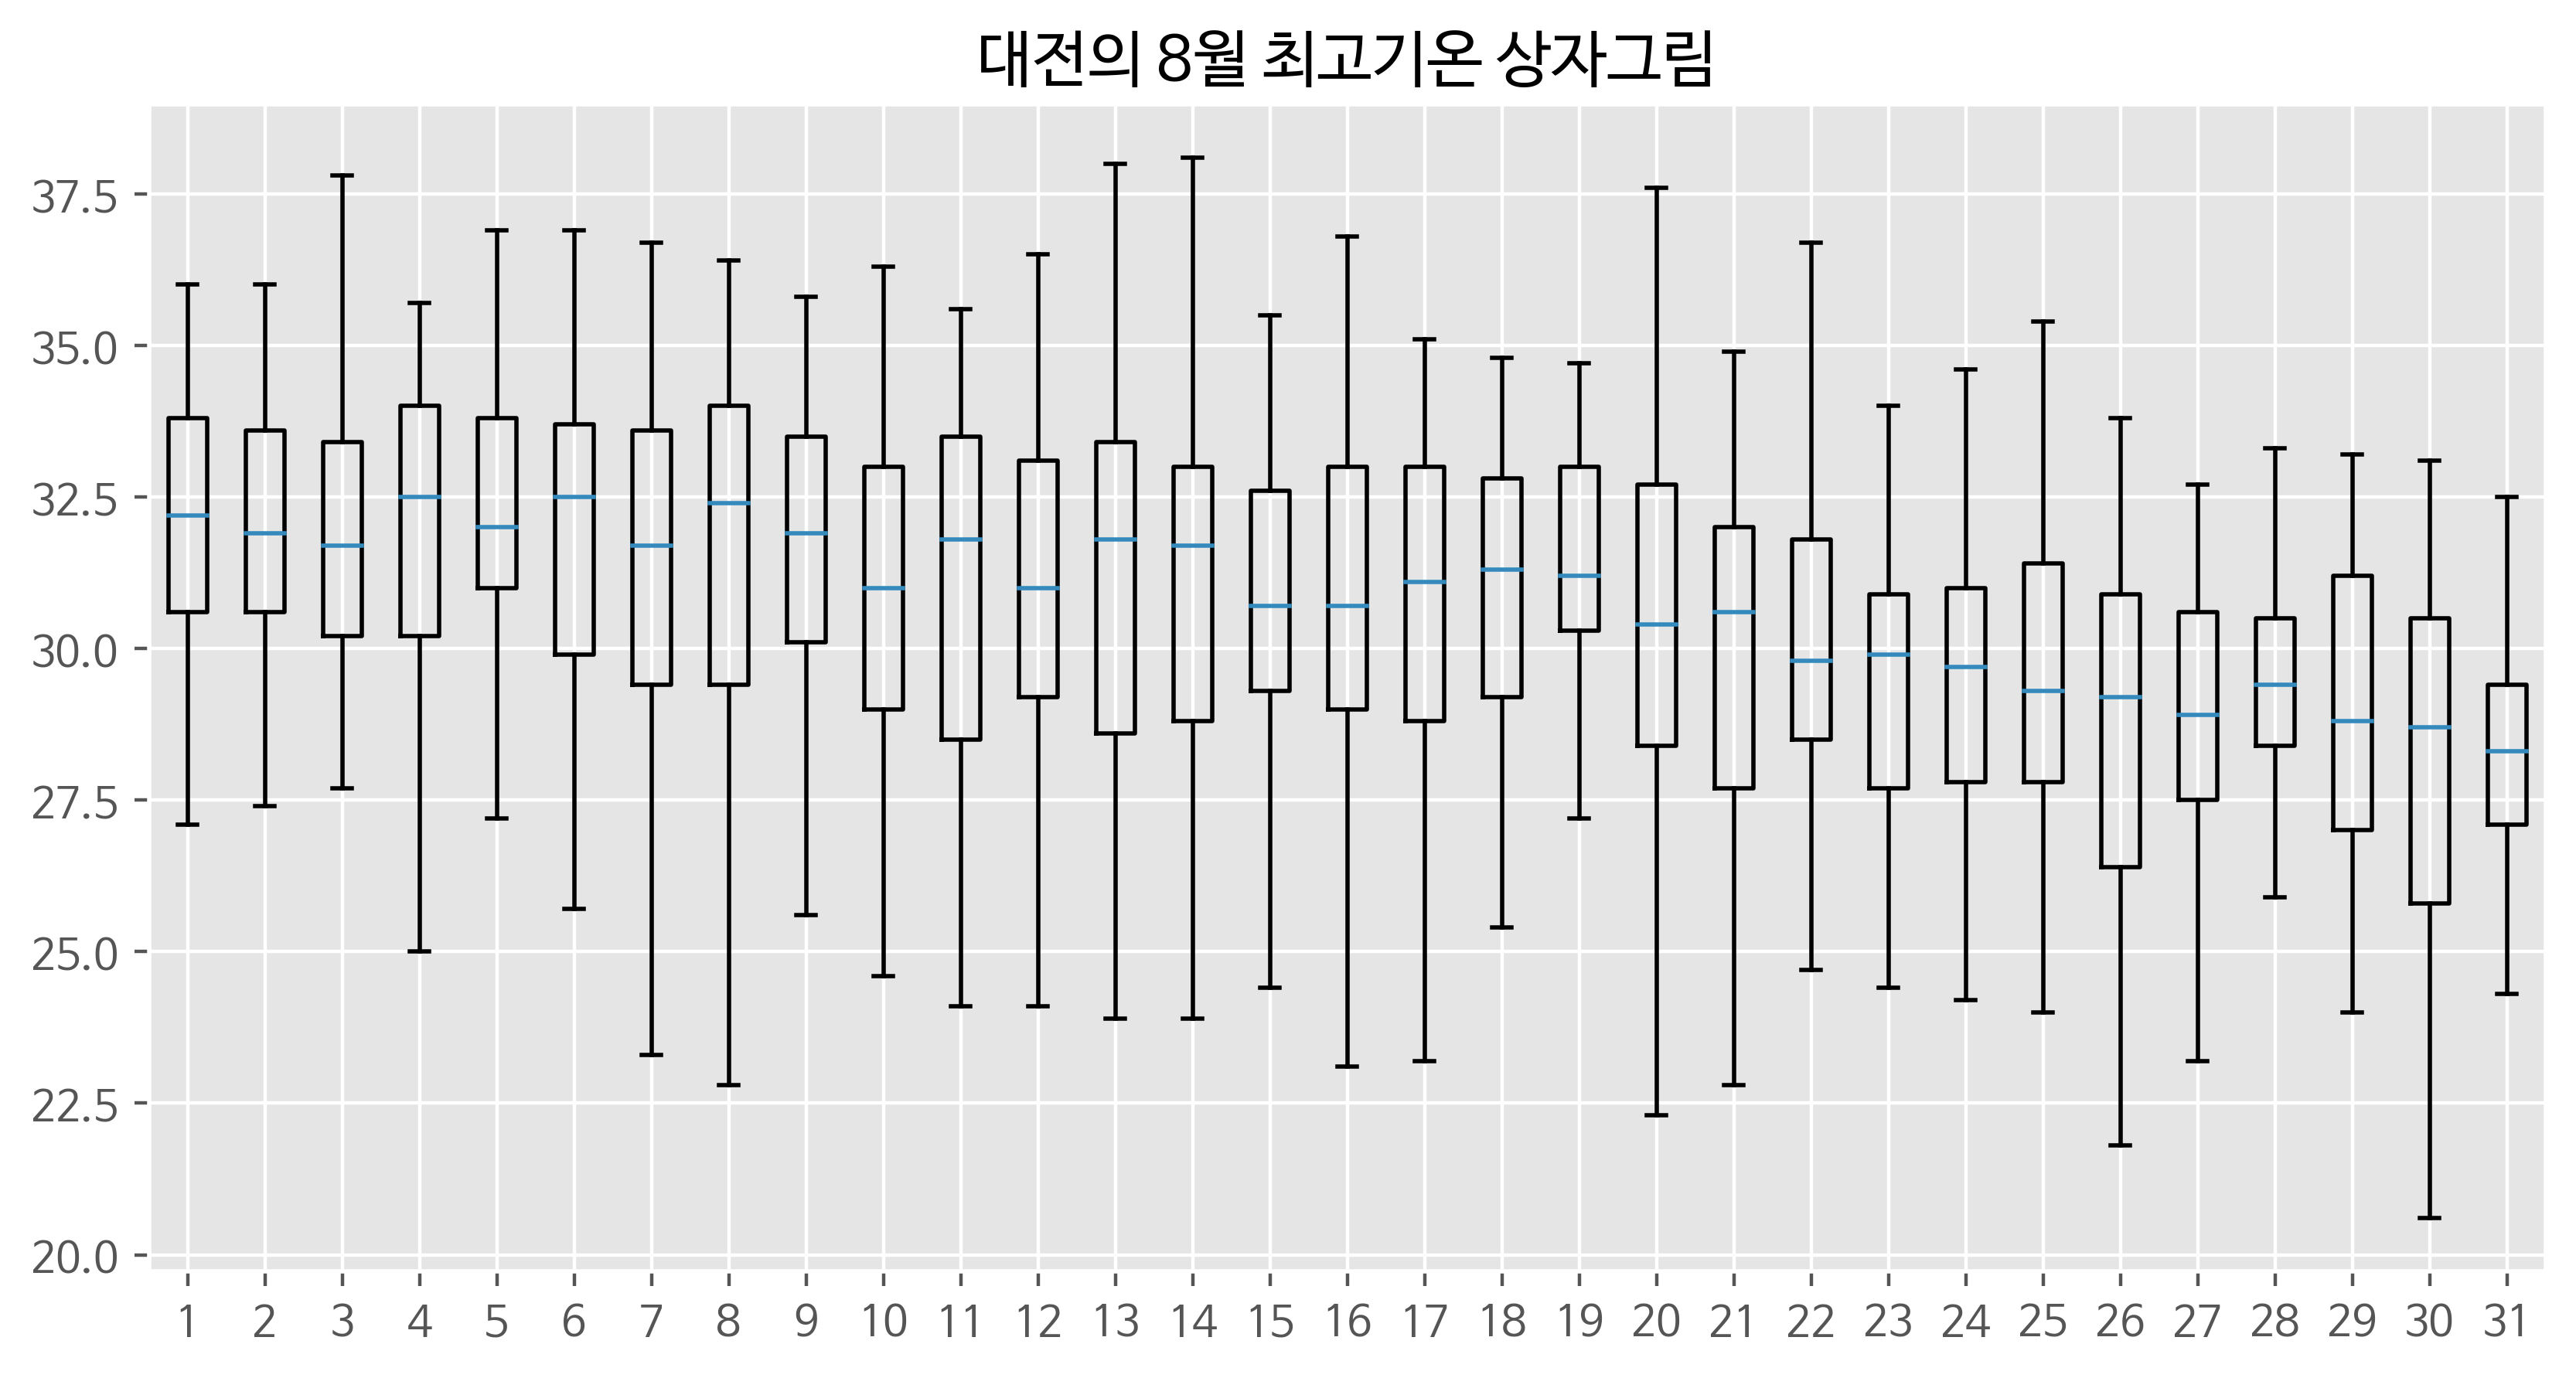

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('pf.csv',encoding='cp949')

data = csv.reader(f)
next(data) #헤더

day=[] #일별 데이터를 저장할 리스트 day변수 선언

for i in range(31):
  day.append([]) #day리스트에 31개 생성

for row in data:
  if row[-1] != '':
    if row[0].split('-')[1] == '08':
      day[int(row[0].split('-')[2])-1].append(float(row[-1]))
      # 8월 최고 기온 값 저장 day[0] -> 1일

plt.style.use("ggplot")
# 그래프 스타일 지정 (회색 배경의 격자무늬, 2/4 값을 의미하는 선의 색 변경)
plt.figure(figsize=(10,5),dpi=200)
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

plt.boxplot(day,showfliers=False) #아웃라이어(이상치) 값 생략
plt.title('대전의 8월 최고기온 상자그림')

plt.show()